Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\pop75\anaconda3\envs\Lee\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\pop75\anaconda3\envs\Lee\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\pop75\anaconda3\envs\Lee\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 24: invalid start byte
c:\Users\pop75\anaconda3\envs\Lee\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\

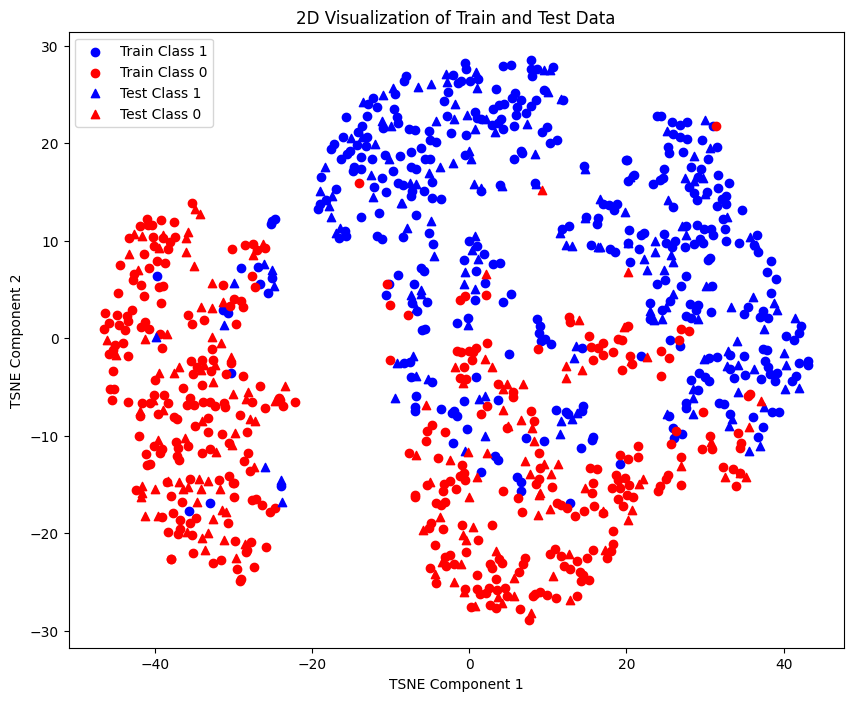

In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
# 예시 데이터 생성 (실제 데이터를 사용하세요)
# x_train = np.array([[...], [...], ...])
# y_train_2d = np.array([...])
# x_test = np.array([[...], [...], ...])
# y_test_2d = np.array([...])

with open('./data/data.pkl','rb') as file:
    data = pickle.load(file)
X = data['X']
y = data['Y']


# TSNE를 이용해 차원 축소
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)

# 시각화
plt.figure(figsize=(10, 8))

# x_train 데이터 시각화
plt.scatter(x_train_2d[y_train_2d == 1, 0], x_train_2d[y_train_2d == 1, 1], color='blue', marker='o', label='Train Class 1')
plt.scatter(x_train_2d[y_train_2d == 0, 0], x_train_2d[y_train_2d == 0, 1], color='red', marker='o', label='Train Class 0')

# x_test 데이터 시각화
plt.scatter(x_test_2d[y_test_2d == 1, 0], x_test_2d[y_test_2d == 1, 1], color='blue', marker='^', label='Test Class 1')
plt.scatter(x_test_2d[y_test_2d == 0, 0], x_test_2d[y_test_2d == 0, 1], color='red', marker='^', label='Test Class 0')

plt.legend()
plt.title('2D Visualization of Train and Test Data')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()